# Outliers:
- Outliers are data points that are very differentfrom most of the values in a dataset
- They can happen because of data entry mistakes, measurement errors, or rare real world events.
- Sometimes outliers are useful (for e.g., fraud detection), but often they can reduce model accuracy and give misleading results.
- That's why identifying and handling outliers is an important step in data processing.

## How to detect a outliers
They are two methods:
- IQR method
- Z-Score Method

### 1. IQR Method
- The Interquartile Range(IQR) method focuses on the spread of the middle 50% of data. It calculates the IQR as the difference between the 75th and 25th percentiles of the data and identifies outliers as those points that falls below 1.5 times the IQR below the 25th percentile or above 1.5 times the IQR above the 75th percentile.This method is robust to outliers and does not assume a normal distribution.

### Steps to detect outliers :
- Step1 : Find Q1 (25th percentage) and Q3(75th percentage)
- Step2 : IQR = Q3 - Q1.
- Step3 : Find:

            Lower bound:  Q1 - 1.5 * IQR
            Upper bound:  Q3 + 1.5 * IQR
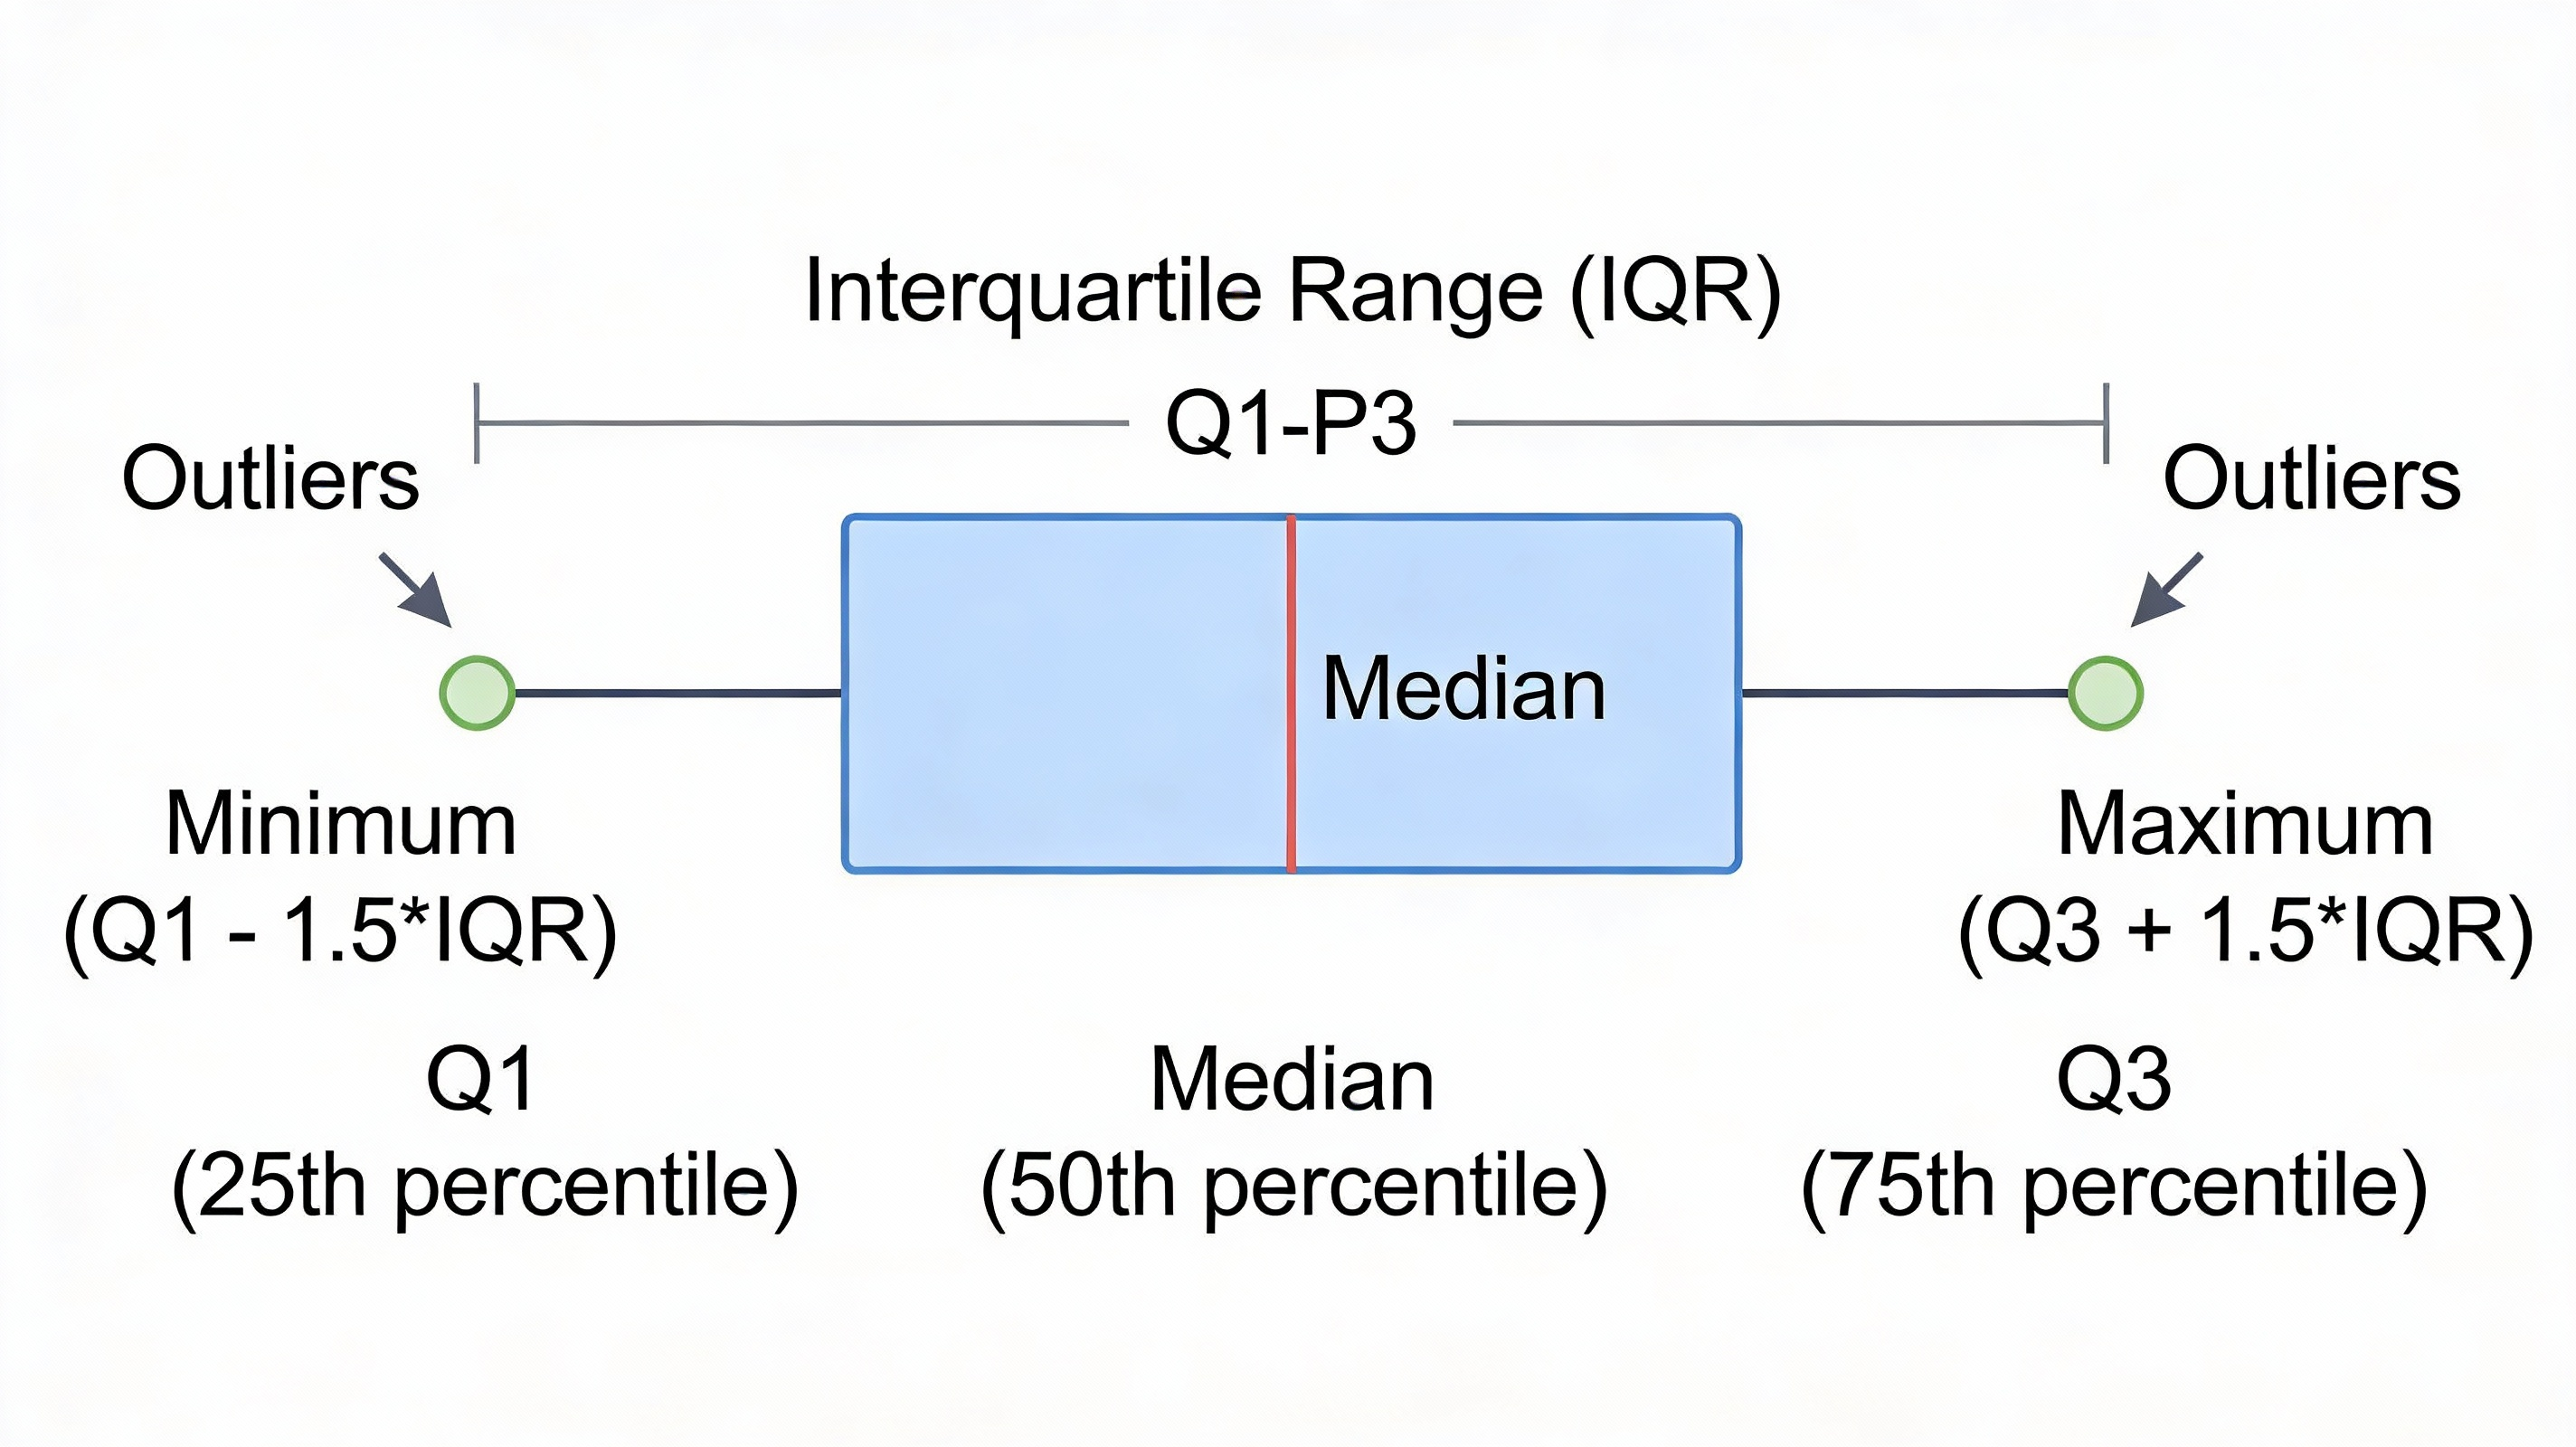

### Example: 
Dataset X = [1, 2, 3, 4, 5, 6, 7, 8, 20], find outlier using the IQR method.

- Q1 (25th percentile): Median of first half[1,2,3,4] = Median of [2,3] = 2.5
- Q3 (75th percentile): Median of second half[6,7,8,20] = Median of [7,8] = 7.5
- IQR = Q3 Q1 = 7.5 2.5 =5
- Lower Bound: Q1 - 1.5 x IQR = 2.5 - 1.5 x 5 = 2.5c- 7.5 =-5
- Upper Bound: Q3 + 1.5 x IQR = 7.5 + 1.5 x 5 = 7.5 + 7.5 = 15
- Therfore the Valid range is -5 to 15. 20 lies outside the range.

In [4]:
import pandas as pd
data = pd.DataFrame({
    "Study_hours": [1,2,3,4,5,6,7,8,9,20]
})
data

,Study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,20


In [5]:
data.describe()

,Study_hours
count,10.000000
mean,6.500000
std,5.400617
min,1.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,20.000000


### IQR Method

In [6]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [7]:
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3  + 1.5 * IQR
ouliers = data[(data < (LB)) | (data > (UB))]

In [8]:
ouliers

,Study_hours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,20.0


In [9]:
Q1

Study_hours    3.25
Name: 0.25, dtype: float64

In [10]:
Q3

Study_hours    7.75
Name: 0.75, dtype: float64

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [12]:
df = pd.DataFrame({
    "Study_hours": [1,2,3,4,5,6,7,8,20]
})
df

,Study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


### 2. Z-score:
- Z-Score method is a statistical technique that detects outliers based on how far a data point is from the mean, measured in terms of standard deviations. It assumes the data follows a normal distribution.
- A point with a very high or low z-Score (typically |Z| > 3) is flagged as an outiler because it lies in the extreme tails of the distribution.

### Formula:
    Z = (x - u)sigma
where,
- x = data value
- u = mean
- sigma = standard deviation

### Why threshold
- z > 3 -> very strict (large dataset)
- z > 2 -> practical for small dataets & teaching

### Z-Score Methods:

In [13]:
df = pd.DataFrame({
    "Study_hours": [1,2,3,4,5,6,7,8,20]
})
df

,Study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,20


In [14]:
z_score = np.abs(stats.zscore(data["Study_hours"]))
outliers = data[z_score > 2]
outliers

,Study_hours
9,20


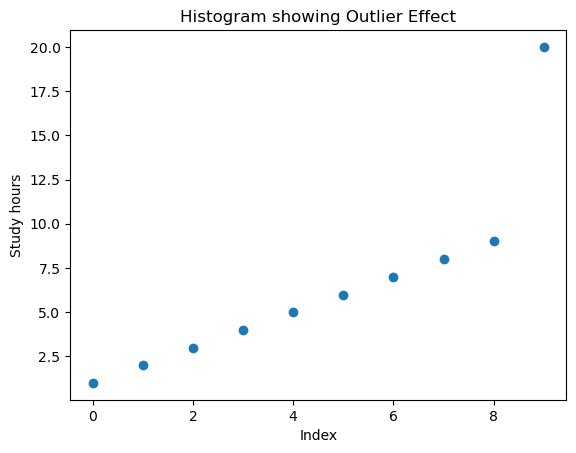

In [15]:
plt.scatter(range(len(data)), data["Study_hours"])
plt.xlabel("Index")
plt.ylabel("Study hours")
plt.title("Histogram showing Outlier Effect")
plt.show()

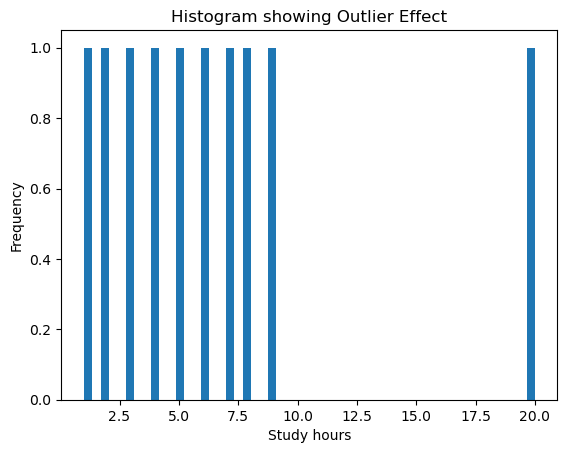

In [16]:
plt.hist(data["Study_hours"], bins=54)
plt.xlabel("Study hours")
plt.ylabel("Frequency")
plt.title("Histogram showing Outlier Effect")
plt.show()